###Write an Algorithm for Stock Price Prediction using Support Vector Regression (SVR)

#### *Importing Libraries*

In [65]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

#### *Loading Dataset*

In [66]:
df = pd.read_csv('NSEI.csv')

In [67]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-18,17438.750000,17527.800781,17434.050781,17486.949219,17486.949219,239500
1,2022-10-19,17568.150391,17607.599609,17472.849609,17512.250000,17512.250000,210500
2,2022-10-20,17423.099609,17584.150391,17421.000000,17563.949219,17563.949219,249600
3,2022-10-21,17622.849609,17670.150391,17520.750000,17576.300781,17576.300781,277700
4,2022-10-24,17736.349609,17777.550781,17707.400391,17730.750000,17730.750000,45000


In [68]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
244,2023-10-12,19822.699219,19843.300781,19772.650391,19794.000000,19794.000000,217900
245,2023-10-13,19654.550781,19805.400391,19635.300781,19751.050781,19751.050781,255000
246,2023-10-16,19737.250000,19781.300781,19691.849609,19731.750000,19731.750000,181000
247,2023-10-17,19843.199219,19849.750000,19775.650391,19811.500000,19811.500000,185800
248,2023-10-18,19820.449219,19840.949219,19659.949219,19671.099609,19671.099609,0


In [69]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,18523.768072,18585.827639,18432.608191,18512.627157,18512.627157,257754.618474
std,831.437041,827.368717,842.513851,836.657649,836.657649,74689.726946
min,16977.300781,17061.750000,16828.349609,16945.050781,16945.050781,0.000000
25%,17867.500000,17945.800781,17779.500000,17858.199219,17858.199219,219200.000000
50%,18340.300781,18417.599609,18262.949219,18329.150391,18329.150391,248800.000000
75%,19405.949219,19457.800781,19317.199219,19386.699219,19386.699219,277700.000000
max,20156.449219,20222.449219,20129.699219,20192.349609,20192.349609,696500.000000


#### *Taking the 1 month records from dataset as a training sample*

In [70]:
start_date = '2022-11-01'
end_date = '2022-12-01'

fill = (df ['Date']>=start_date) & (df ['Date']<=end_date)
df = df .loc[fill]

In [71]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
9,2022-11-01,18130.699219,18175.800781,18060.150391,18145.400391,18145.400391,349900
10,2022-11-02,18177.900391,18178.750000,18048.650391,18082.849609,18082.849609,270900
11,2022-11-03,17968.349609,18106.300781,17959.199219,18052.699219,18052.699219,213000
12,2022-11-04,18053.400391,18135.099609,18017.150391,18117.150391,18117.150391,267900
13,2022-11-07,18211.750000,18255.500000,18064.750000,18202.800781,18202.800781,314800


In [72]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
26,2022-11-25,18528.449219,18534.900391,18445.099609,18512.750000,18512.750000,205900
27,2022-11-28,18430.550781,18614.250000,18365.599609,18562.750000,18562.750000,206500
28,2022-11-29,18552.449219,18678.099609,18552.150391,18618.050781,18618.050781,195300
29,2022-11-30,18625.699219,18816.050781,18616.550781,18758.349609,18758.349609,345600
30,2022-12-01,18871.949219,18887.599609,18778.199219,18812.500000,18812.500000,325000


#### *Prediction using SVR*

In [73]:
df=df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
9,2022-11-01,18130.699219,18175.800781,18060.150391,18145.400391,18145.400391,349900
10,2022-11-02,18177.900391,18178.750000,18048.650391,18082.849609,18082.849609,270900
11,2022-11-03,17968.349609,18106.300781,17959.199219,18052.699219,18052.699219,213000
12,2022-11-04,18053.400391,18135.099609,18017.150391,18117.150391,18117.150391,267900
13,2022-11-07,18211.750000,18255.500000,18064.750000,18202.800781,18202.800781,314800
14,2022-11-09,18288.250000,18296.400391,18117.500000,18157.000000,18157.000000,307200
15,2022-11-10,18044.349609,18103.099609,17969.400391,18028.199219,18028.199219,256500
16,2022-11-11,18272.349609,18362.300781,18259.349609,18349.699219,18349.699219,378500
17,2022-11-14,18376.400391,18399.449219,18311.400391,18329.150391,18329.150391,301400
18,2022-11-15,18362.750000,18427.949219,18282.000000,18403.400391,18403.400391,250900


#### *extracting days from date for training*

In [74]:
days = list()
adj_close_prices = list()

In [75]:
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [76]:
df_days

9     2022-11-01
10    2022-11-02
11    2022-11-03
12    2022-11-04
13    2022-11-07
14    2022-11-09
15    2022-11-10
16    2022-11-11
17    2022-11-14
18    2022-11-15
19    2022-11-16
20    2022-11-17
21    2022-11-18
22    2022-11-21
23    2022-11-22
24    2022-11-23
25    2022-11-24
26    2022-11-25
27    2022-11-28
28    2022-11-29
29    2022-11-30
Name: Date, dtype: object

In [77]:
for day in df_days:
    days.append( [int(day.split('-')[2])] )

In [78]:
days

[[1],
 [2],
 [3],
 [4],
 [7],
 [9],
 [10],
 [11],
 [14],
 [15],
 [16],
 [17],
 [18],
 [21],
 [22],
 [23],
 [24],
 [25],
 [28],
 [29],
 [30]]

In [79]:
for adj_close_price in df_adj_close:
    adj_close_prices.append( float(adj_close_price) )

In [80]:
adj_close_prices

[18145.400391,
 18082.849609,
 18052.699219,
 18117.150391,
 18202.800781,
 18157.0,
 18028.199219,
 18349.699219,
 18329.150391,
 18403.400391,
 18409.650391,
 18343.900391,
 18307.650391,
 18159.949219,
 18244.199219,
 18267.25,
 18484.099609,
 18512.75,
 18562.75,
 18618.050781,
 18758.349609]

#### *Fitting data to the different types of SVR algorithm (linear,polynomial and rdf)*

In [81]:
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days,adj_close_prices)
poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(days, adj_close_prices)
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, gamma=0.15)

#### *Comparing actual price with predicted price*

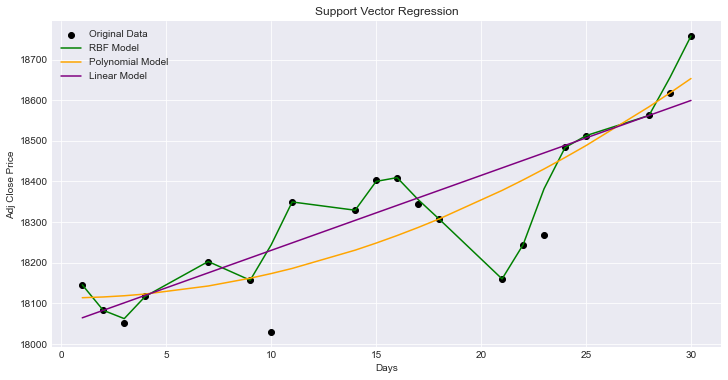

In [82]:
plt.figure(figsize=(12,6))
plt.scatter(days, adj_close_prices, color = 'black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'purple', label='Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

#### *Predicting the stock price for day 30*

In [83]:
day=[[30]]
print('The RBF SVR predicted:',rbf_svr.predict(day ))
print('The Linear SVR predicted:', lin_svr.predict(day))
print('The Polynomial SVR predicted:', poly_svr.predict(day))

The RBF SVR predicted: [18758.24956082]
The Linear SVR predicted: [18599.5654147]
The Polynomial SVR predicted: [18653.57095153]
